# **Project Proposal - Group 37**

## Group members:
- Nadia Khalil Arjomandi- Savero Lukianto Chandra - Brianna De Souza - 
Sophia Sheng


# I. Introduction

In a world where it's important to understand how the economy works to make good choices, being able to guess how much money people will earn is really useful. Our project focuses on this area by asking a profound question: Can we predict if a person earns more than 50,000 dollars a year by looking at certain aspects of their life, like their age, education level, capital gain and loss, and work hours per week? This question is not only important for the project but also it has real-world applications in policy making and marketing. Capital Gains are usually gains from the sale of assets such as stocks, bonds, property or businesses and are considered taxable income.  It's the total income derived from capital gains during the census period. Capital loss is the total loss incurred during the census period on the sale of a capital asset for less than its original purchase price. We've chosen to work with the "Adult" dataset from the UCI Machine Learning Repository, a collection of data taken from the 1994 Census. Our main aim is to create a model that can accurately guess whether someone's annual income is over 50,000 dollars. This can be seen as the line between middle and higher income groups in the United States. By focusing on this income level we're trying to figure out what drives financial success. We will visualize the population in the preliminary stage to show that there is an influence from the corresponding parameter that is useful to make predictions. 

# II. Preliminary Data Analysis

### i. Installing the Required Libraries

In [1]:
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### ii. Reading the Dataset into R

In [2]:
# The URL that contains the data set.
url <- "https://raw.githubusercontent.com/Syzophia/dsci100-group-37-project/main/adult.data"

# Reading the data set.
adult_data <- read.csv(url) 

# Showing the first 6 rows of the raw data.
head(adult_data)

,X39,State.gov,X77516,Bachelors,X13,Never.married,Adm.clerical,Not.in.family,White,Male,X2174,X0,X40,United.States,X..50K
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


### iii. Wrangling and Cleaning Data into a Tidy Format

#### A. Giving Readable Column Names for the Data Set

In [3]:
# First, we rename the columns to improve the readability of the data frame.

# assigning column names for the data frame.
colnames (adult_data) <- c("age", "workclass", "fnlwgt", "education", "education_level", "marital_status",
                            "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
                            "weekly_work_hours", "native_country", "income")
head(adult_data)

,age,workclass,fnlwgt,education,education_level,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,weekly_work_hours,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


#### B. Choosing the Country to Focus on
We focus our classification project on one country because, in real life, some factors that affect one's income are country-dependent. People in different countries have different difficulties in gaining 50,000 USD.

(Word count = 31)

In [4]:
# Summarize the count of each country in the data set.
list_of_countries <- adult_data |> group_by(native_country) |> summarize (count = n()) |> arrange(-count)
list_of_countries
# In the table below, we can see that most people reside in the US. Afterward, we only take into account the people
# whose native country is the US.
# In the table below, we also found 583 missing points for the native_country variable.

native_country,count
<chr>,<int>
United-States,29169
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [5]:
# Modifying the data frame so that only the data points having the US as their native country are included.
adult_data |> filter (native_country == "United-States")
head(adult_data)

age,workclass,fnlwgt,education,education_level,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,weekly_work_hours,native_country,income
<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>


,age,workclass,fnlwgt,education,education_level,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,weekly_work_hours,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


#### C. Selecting Relevant Variables for the Classification Model
To perform the classification algorithm, we need to convert `income` into a `fct` data type and only select numerical variables for the predictors.

(Word count = 23)

In [6]:
# Selecting the columns associated which numerical variables, continued by converting income into a factor variable.
adult_data <- adult_data |> select (age, education_level, capital_gain, capital_loss, weekly_work_hours, income) |>
                            mutate (income = as_factor(income))
head(adult_data)

,age,education_level,capital_gain,capital_loss,weekly_work_hours,income
,<int>,<int>,<int>,<int>,<int>,<fct>
1,50,13,0,0,13,<=50K
2,38,9,0,0,40,<=50K
3,53,7,0,0,40,<=50K
4,28,13,0,0,40,<=50K
5,37,14,0,0,40,<=50K
6,49,5,0,0,16,<=50K


Now, the data frame is tidy since it only has one variable per column, one observation per row, and one value per cell.

(Word count = 23)

#### D. Splitting the Data Frame into a Training Set and a Testing Set

In [7]:
set.seed(250)
# splitting the data frame into a training set and a testing set.
# in this project, 70% data is used as the training set.
adult_split <- initial_split (adult_data, prop = 0.7, strata = income)
adult_training <- training(adult_split)
adult_testing <- testing (adult_split)

#### E. Summarizing the Key Features in the Training Data Set
1) **Number of observations and variables**

In [8]:
dimension <- tibble (dim (adult_training))
dimension
# The table shows that the training data set has 22791 rows and 6 columns.

dim(adult_training)
<int>
22791
6


2. **Average of all predictors**

In [9]:
# Select all columns in the training data set except income.
# Then, calculate the average of each predictor while removing missing data points.
pred_mean <- adult_training |> select (- income) |>
                               map_df (mean, na.rm = TRUE)
pred_mean

age,education_level,capital_gain,capital_loss,weekly_work_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
38.62959,10.07718,1108.67,86.66601,40.45829


3. **Number of missing data points**

In [10]:
nas <- adult_training |> select (- income) |>
                    map_df (mean, na.rm = TRUE) |>
                    mutate(na_count = sum(is.na (adult_training)))
nas
# Apparently, there is no missing data point in our training data set.

age,education_level,capital_gain,capital_loss,weekly_work_hours,na_count
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
38.62959,10.07718,1108.67,86.66601,40.45829,0


4. **Median of all predictors**

In [11]:
# Select all columns in the training data set except income.
# Then, calculate the median of each predictor while removing missing data points.
pred_median <- adult_training |> select (- income) |>
                               map_df (median, na.rm = TRUE)
pred_median

age,education_level,capital_gain,capital_loss,weekly_work_hours
<int>,<int>,<int>,<int>,<int>
37,10,0,0,40


### iv. Visualizing Data

### A. Visualizing the distribution of age

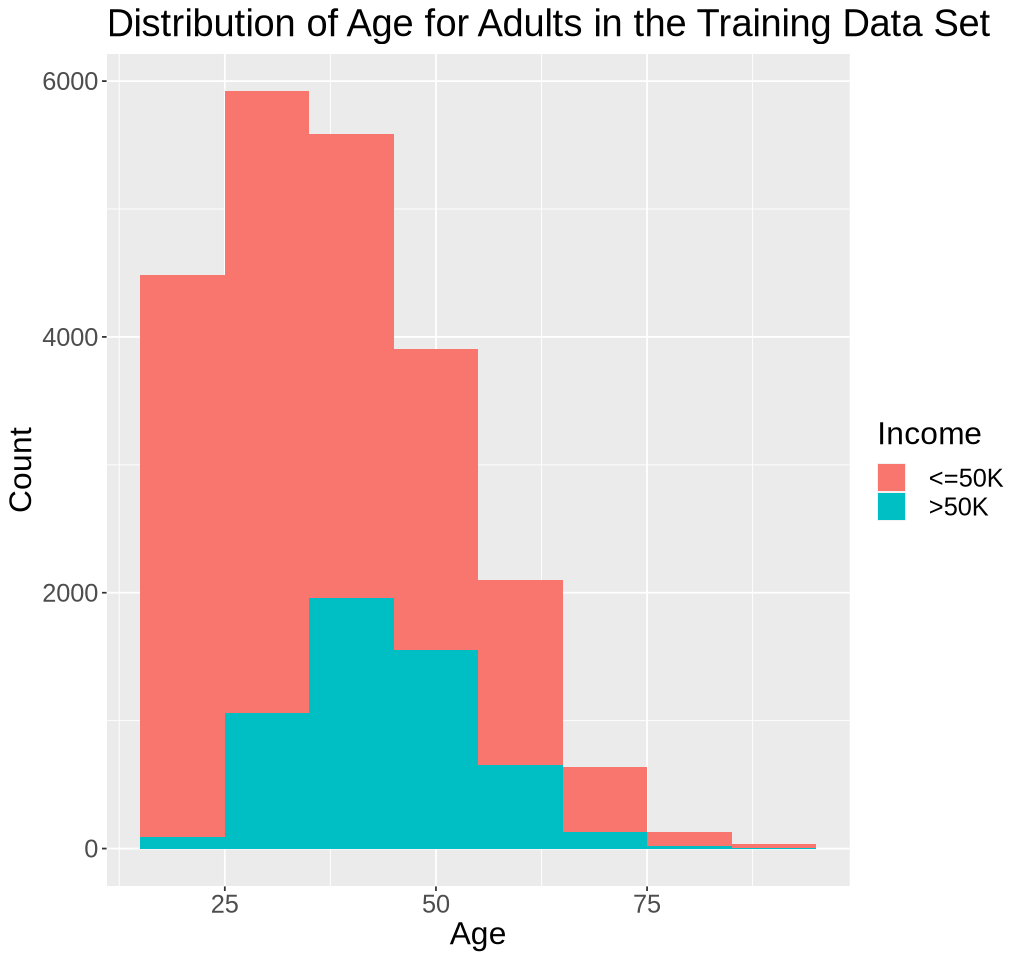

In [74]:
options(repr.plot.height = 8, repr.plot.width = 8.5)
age_histogram <- adult_training |> ggplot (aes (x = age, fill = income)) + 
              geom_histogram(binwidth = 10) + 
              labs(x = "Age", y = "Count", fill = "Income", title = "Distribution of Age for Adults in the Training Data Set") +
              theme (text = element_text (size = 19))
age_histogram

### B. Visualizing the distribution of education level

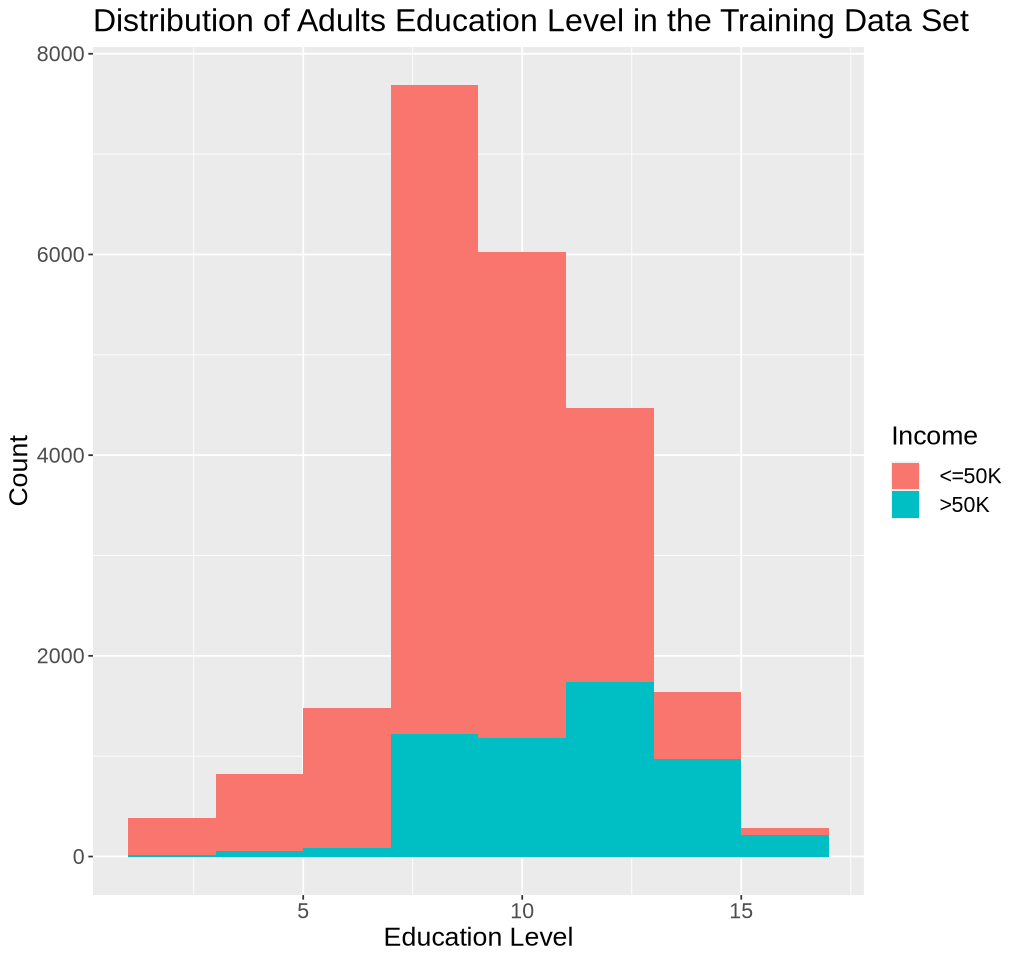

In [13]:
edu_histogram <- adult_training |> ggplot (aes (x = education_level, fill = income)) + 
              geom_histogram(binwidth = 2) + 
              labs(x = "Education Level", y = "Count", fill = "Income", title = "Distribution of Adults Education Level in the Training Data Set") +
              theme (text = element_text (size = 16))
edu_histogram

In [63]:
adult_training_gain_count <- adult_training |>
group_by(income, capital_gain)|>
summarize(count = n())
adult_training_gain_count

`summarise()` has grouped output by 'income'. You can override using the
`.groups` argument.


income,capital_gain,count
<fct>,<int>,<int>
<=50K,0,16590
<=50K,114,4
<=50K,401,1
<=50K,594,23
<=50K,914,6
<=50K,991,3
<=50K,1055,15
<=50K,1086,4
<=50K,1111,1


### C. Visualizing the distribution of capital gain

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 44 rows containing missing values (`geom_bar()`).”


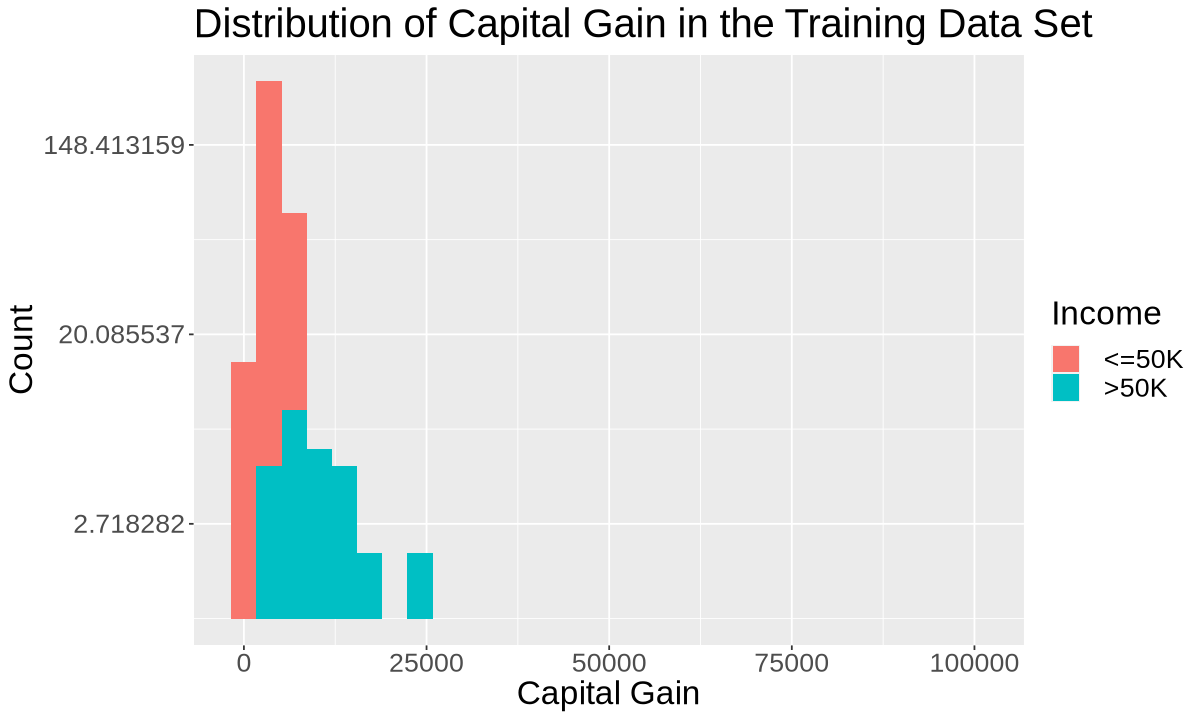

In [65]:
#Here the points of the y-axis and x_axis are far apart, and we need to zoom in on the image in the lower right corner to visualize the results.
options(repr.plot.height = 6, repr.plot.width = 10)
capital_gain_plot <- adult_training_gain_count|>
      filter (capital_gain != 0)|>
      ggplot(aes(x = capital_gain, fill = income)) +
      geom_histogram() +
      labs(title = "Distribution of Non_zero Capital Gain in the Training Data Set",
           x = "Capital Gain",
           y = "Count",
           fill= "Income")+
        theme (text = element_text (size = 20))+
          scale_y_continuous(trans = 'log') 
          scale_x_continuous(trans = 'log')
capital_gain_plot 

In [66]:
adult_training_loss_count <- adult_training |>
group_by(income, capital_loss)|>
summarize(count2 = n())
adult_training_loss_count

`summarise()` has grouped output by 'income'. You can override using the
`.groups` argument.


income,capital_loss,count2
<fct>,<int>,<int>
<=50K,0,16785
<=50K,155,1
<=50K,213,4
<=50K,323,1
<=50K,419,3
<=50K,625,10
<=50K,653,1
<=50K,810,1
<=50K,880,4


### D. Visualizing the distribution of capital loss

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 26 rows containing missing values (`geom_bar()`).”


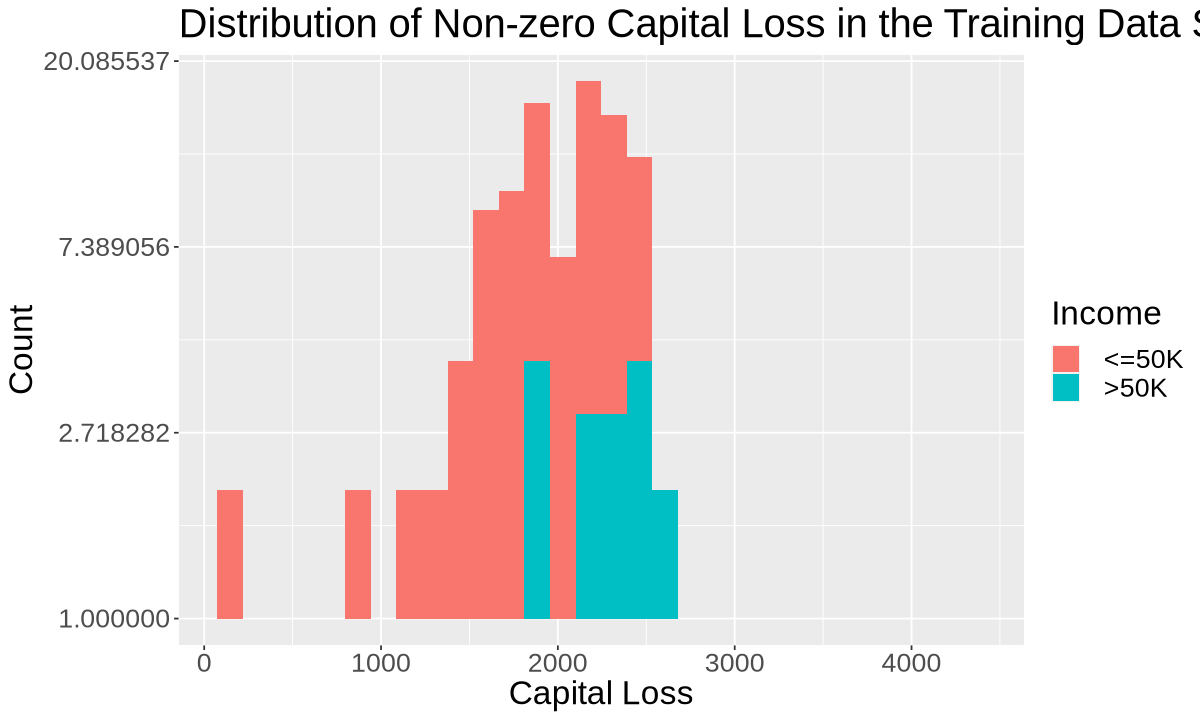

In [68]:
capital_loss_plot <- adult_training_loss_count|>
      filter (capital_loss!= 0)|>
      ggplot(aes(x = capital_loss, fill = income)) +
      geom_histogram() +
      labs(title = "Distribution of Non-zero Capital Loss in the Training Data Set",
           x = "Capital Loss",
           y = "Count",
           fill= "Income")+
        theme (text = element_text (size = 20))+
          scale_y_continuous(trans = 'log') 
          scale_x_continuous(trans = 'log')
capital_loss_plot 

### E. Visualizing the distribution of weekly work hours

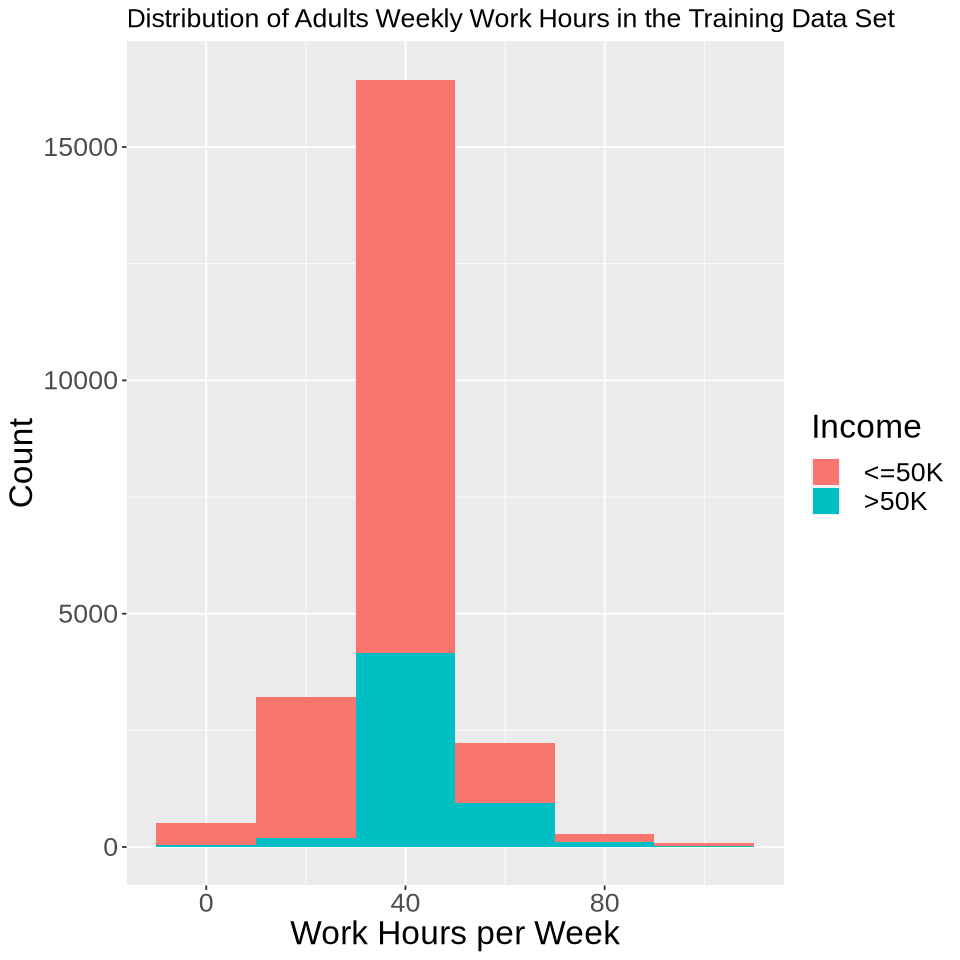

In [86]:
options(repr.plot.height = 8, repr.plot.width = 8)
weekly_work_hours_histogram <- adult_training |> 
              ggplot (aes (x = weekly_work_hours, fill = income)) + 
              geom_histogram(binwidth = 20) + 
              labs(x = "Work Hours per Week", y = "Count", fill = "Income", title = "Distribution of Adults Weekly Work Hours in the Training Data Set") +
              theme (text = element_text (size = 20),
              plot.title = element_text(size =16))
weekly_work_hours_histogram

# III. Methods

### i. Data Analysis

We aim to create a binary classification algorithm that predicts whether one's income exceeds $ 50k by using the KNN classification. Our data set contains 15 columns but we only select the following five numerical parameters as the predictors in our classification algorithm.

- We use `age` as a predictor because we observed a higher prevalence of middle-aged people who earn more than  50k in the exploratory data analysis, indicating the influence of age in determining one's income.
- We use `education_level`, `capital_gain`, `capital_loss`, and `weekly_work_hours` because the plots in the exploratory phase show positive relationships between each variable and `income`.

To construct the classification process, we start by dividing the data set into a training set (75%) and a testing set (25%) using `income` as the strata argument. Then, we use `tune()` to determine the best $K$, number of nearest neighbors, for our model. Finally, we proceed with the regular procedure in performing the KNN classification.

### ii. Data Visualization

We will visualize our result with several scatterplots showing the relationships of the predictors with different colors for data points having more than 50k income and those with less than 50k income. Moreover, we depict $K$ versus accuracy to determine the best value of $K$ for our model.

# IV. Expected Outcomes and Significance

Firstly, according to the histogram above, we expect to find a positive correlation between age and incomes exceeding 50,000 dollars. As age reaches a value, income start to decrease. We predict that older individuals may have higher incomes on average, in comparison to younger individuals, as with more seniority and experience in the workforce, they are able to develop a more valuable skill set which results in higher salaries. Furthermore, those who have been in the workforce for a longer period of time will likely have had greater opportunities to move up in rank within their respective positions, taking on roles that have greater responsibilities, and therefore higher salaries. However, their creativity and reactive ability might be contrained when they reach a higher age stage. Our findings could be influential for individuals approaching retirement age, as the insights from this analysis could be used to make informed decisions regarding when to retire and financial planning strategies.

Additionally we predict that individuals with more working hours per week will be more likely to have an income over 50,000 dollars ,especially if overtime pay is taken into consideration. Findings in regards to the relationship between working hours and income could be influential in terms of work-life balance. While longer working hours may be associated with higher incomes, it is important to consider the long term impact of working long hours on individuals’ health and well-being. This poses the question of “What is the minimum number of working hours (in general) that allows individuals to surpass the 50,000 dollars income threshold?” Exploring this question would allow individuals to consider career options that roughly adhere to those hours, in order to allow for a good work-life balance, in which they can still be financially stable.

